In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as hcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
# Load the data
url = "https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/clustering/data/country.txt"
data = pd.read_csv(url)
print(data.head())
print(data.shape)

            country  child_mort  exports  health  imports  income  inflation  \
0          Mongolia        26.1     46.7    5.44     56.7    7710      39.20   
1             Sudan        76.7     19.7    6.32     17.2    3370      19.60   
2            Malawi        90.5     22.8    6.59     34.9    1030      12.10   
3           Belgium         4.5     76.4   10.70     74.7   41100       1.88   
4  Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609      20.80   

   life_expec  total_fer   gdpp  
0        66.2       2.64   2650  
1        66.3       4.88   1480  
2        53.1       5.31    459  
3        80.0       1.86  44400  
4        57.5       6.54    334  
(151, 10)


In [3]:
# Standardize the data using the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])
print(data_scaled[1])

[ 0.95519199 -0.73823876 -0.16973596 -1.18827684 -0.73618693  1.07358882
 -0.49814644  1.29100513 -0.64993089]


In [4]:
# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

c:\Users\Max Harnisch\anaconda3\envs\pandas\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Max Harnisch\anaconda3\envs\pandas\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Max Harnisch\anaconda3\envs\pandas\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Max Harnisch\anaconda3\envs\pandas\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

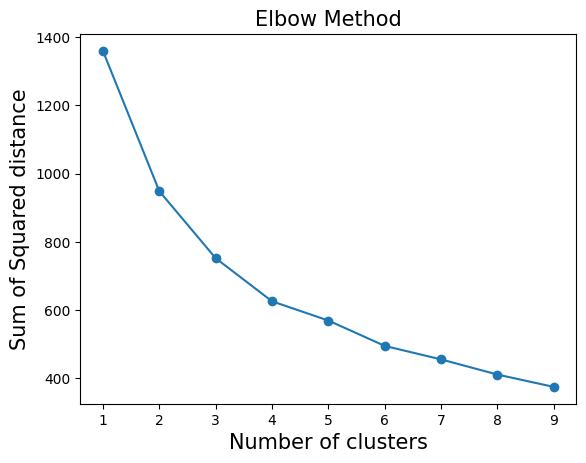

In [5]:
# plot elbow curve
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data_scaled)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

The elbow point value is the number of clusters at which the line graph has the sharpest decrease. In this case, the elbow point value is 3 clusters.

In [6]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(data_scaled)

#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

c:\Users\Max Harnisch\anaconda3\envs\pandas\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Max Harnisch\anaconda3\envs\pandas\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2    74
1    42
0    35
dtype: int64

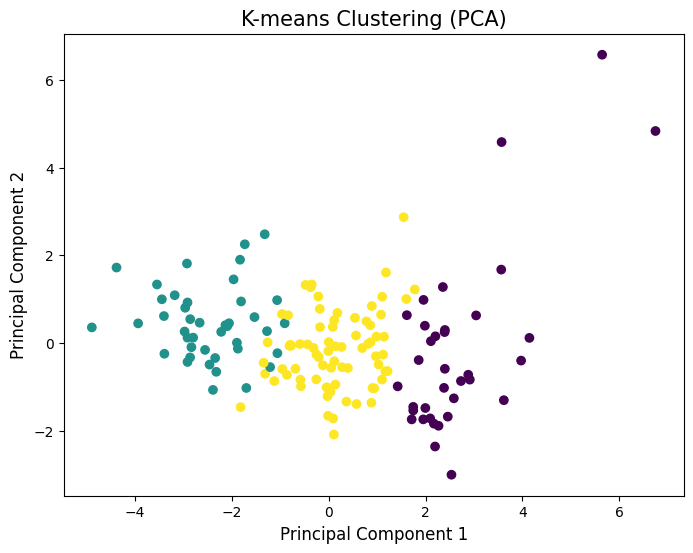

In [7]:
# Visualize K-means clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering (PCA)', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.show()

In [8]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3
metrics.silhouette_score(data_scaled, kmeans.labels_)

0.2779707425557981

In [9]:
#predicting values
cluster_labels = kmeans.fit_predict(data_scaled)
preds = kmeans.labels_
kmeans_df = pd.DataFrame(data)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

c:\Users\Max Harnisch\anaconda3\envs\pandas\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Max Harnisch\anaconda3\envs\pandas\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650,2
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480,1
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,1
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1
5,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400,0
6,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1980,2
7,Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700,2
8,Georgia,16.5,35.0,10.10,52.8,6730,8.55,72.8,1.92,2960,2
9,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,1


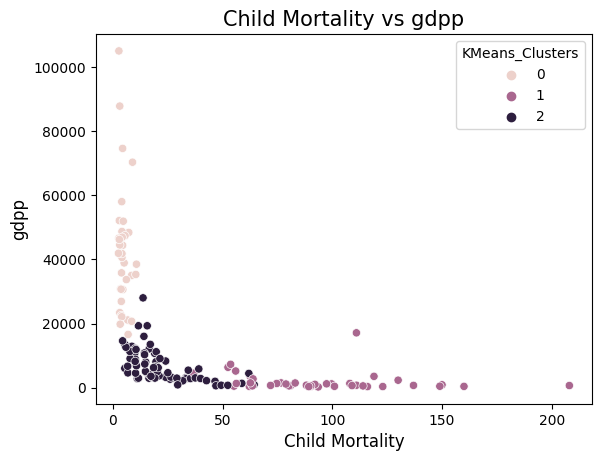

In [10]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(x='child_mort', y='gdpp', hue='KMeans_Clusters', data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

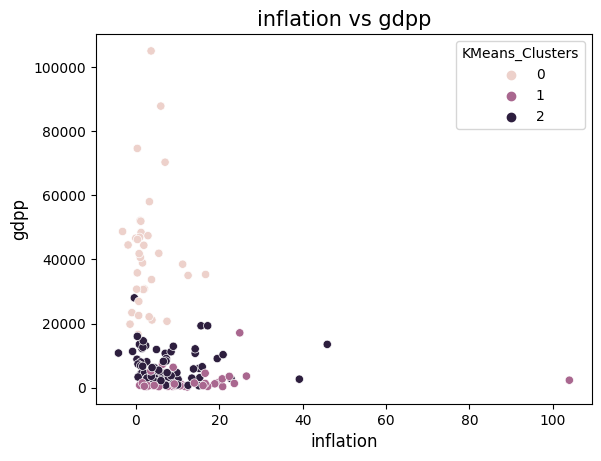

In [11]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(x='inflation', y='gdpp', hue='KMeans_Clusters', data=kmeans_df) 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above two clusters graph we can conclude that

    - Country having high child-mortality, low GDP per catia and low inflation is a under-developing country
    - Country having low child-mortality, high gdpp and high infaltion is the developed country

So here we conclude that

    1 = under-developing country
    2 = developing country
    0 = developed country

In [12]:
#find number of developed country,developing country,under-developed country
under_developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developing=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']
developed=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']

print("Number of deveoped countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(developed))

#list of under-developing countries
print("- - -")
print(list(under_developing))

Number of deveoped countries 42
Number of developing countries 74
Number of under-developing countries 35
- - -
['Sudan', 'Malawi', 'Congo, Dem. Rep.', 'Lesotho', 'Burundi', 'Mauritania', 'Pakistan', 'Kenya', 'Sierra Leone', 'Timor-Leste', 'Comoros', 'Madagascar', 'Benin', 'Eritrea', 'Iraq', 'Cameroon', 'Uganda', 'Botswana', 'Afghanistan', 'Haiti', 'Gambia', 'Ghana', 'Rwanda', 'South Africa', 'Congo, Rep.', 'Mozambique', 'Chad', 'Guinea', 'Niger', 'Angola', 'Liberia', 'Yemen', 'Tanzania', 'Lao', 'Namibia', 'Kiribati', 'Zambia', 'Guinea-Bissau', 'Mali', 'Central African Republic', 'Nigeria', 'Equatorial Guinea']


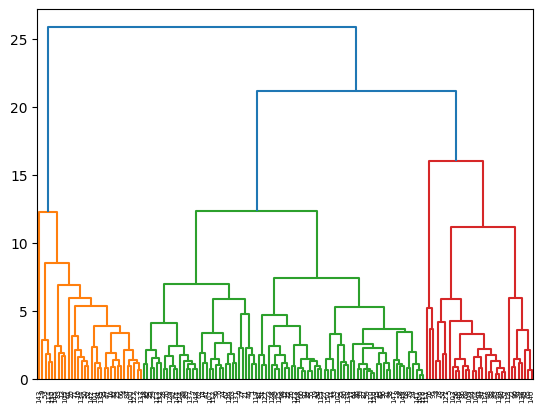

In [13]:
#plotting dendogram
dend=hcluster.dendrogram(hcluster.linkage(data_scaled,method='ward'))
plt.show()

In [14]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(data_scaled)
hcluster_label = hcluster.labels_
#print(hcluster_label)


hcluster_df = pd.DataFrame(data)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

c:\Users\Max Harnisch\anaconda3\envs\pandas\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,hcluster
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650,2,2
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480,1,2
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,1,1
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400,0,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1,1


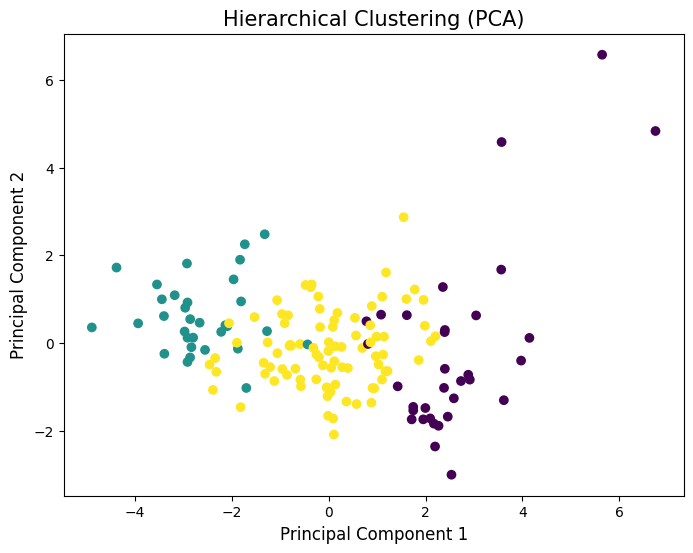

In [15]:
# Visualize Hierarchical clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=hcluster_label, cmap='viridis')
plt.title('Hierarchical Clustering (PCA)', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.show()

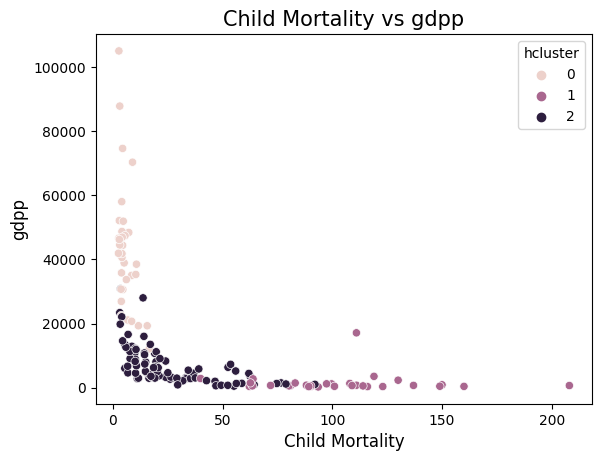

In [16]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(x='child_mort', y='gdpp', hue='hcluster', data=kmeans_df)
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

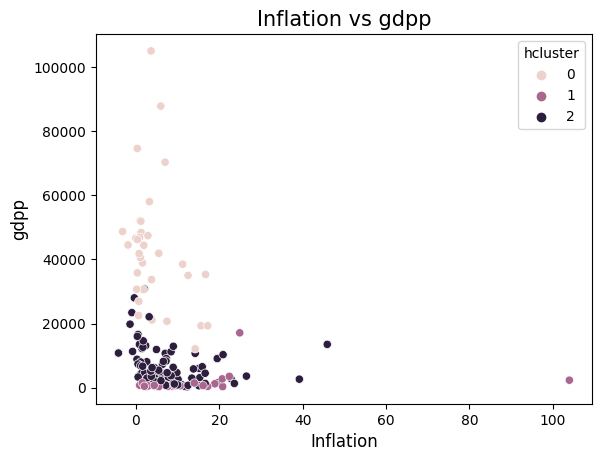

In [17]:
#visulazing hcluster results
sns.scatterplot(x='inflation', y='gdpp', hue='hcluster', data=kmeans_df)
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above we can conclude that:

    0 = developed country
    2 = developing country
    1 = under-developing country

In [18]:
#find number of developed country,developing country,under-developed country
developed=hcluster_df[hcluster_df['hcluster']==0]['country']
developing=hcluster_df[hcluster_df['hcluster']==2]['country']
under_developing=hcluster_df[hcluster_df['hcluster']==1]['country']

print("Number of deveoped countries",len(developed))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(under_developing))

Number of deveoped countries 33
Number of developing countries 86
Number of under-developing countries 32
